# 1. Создание ДФ
Дата-фрейм будет состоять из 10000 строк и 5 колонок.<br>
Каждую из колонок мы предлагаем тебе создать и наполнить далее.<br><br>

<ul>
<li>1-я колонка - user_id. Длина user_id должна равняться 15-ти символам и состоять из случайной комбинации следующих символов: "1234567890abcdefghijk". Комбинации каждого id в df формируются рандомно.</li>
<li>2-я колонка - номер заказа. Случайные значения лежат в диапазоне от 1 до 10.</li>
<li>3-я колонка - время доставки. Значения берутся из нормального распределения со средним 1440 и стандартным отклонением в 200.</li>
<li>4-я колонка - общая стоимость заказа. Значения берутся из экспоненциального распределения с параметром лямбда = 1, смещённого на +1.</li>
<li>5-я колонка - ретеншен - день жизни покупателя, в который он совершил заказ. Сгенерировать значения 1,2,3,4,5 с соответствующими вероятностями 0.35, 0.25, 0.2, 0.15, 0.05.</li>
</ul><br>
В случае дублей user_id, оставьте только первую из дублирующихся записей.


In [1]:
import pandas as pd
import random


# Длина дф
len_ = 10000
data = []

# user_id
user_id = [''.join(random.choices('1234567890abcdefghijk', k=15)) for i in range(len_)]

# order_num
order_num = [random.randrange(1, 11) for i in range(len_)]

# delivery_time
deliv_time = [random.gauss(1440, 200) for i in range(len_)]

# order_price
order_price = [random.expovariate(1)+1 for i in range(len_)]

# retention_day
lst = 35*[1] + 25*[2] + 20*[3] + 15*[4] + 5*[5]
retention_day = [random.choice(lst) for i in range(len_)]

# Создадим дф
df = pd.DataFrame({'user_id': user_id, 'order_num': order_num,
                   'delivery_time': deliv_time, 'order_price': order_price,
                   'retention_day': retention_day})
df = df.drop_duplicates(subset=['user_id']).reset_index(drop=True)

df

,user_id,order_num,delivery_time,order_price,retention_day
0,25c8e81953fc46f,3,1515.524543,1.079830,1
1,9d00j1g134a1jj5,3,1164.150993,2.281233,3
2,c44h49f6k6j357g,3,1641.847569,1.122376,1
3,0dhifbc2b8d6k8a,9,1428.954921,2.984391,1
4,c8f9jgeib71k0b8,10,1241.039548,1.934442,3
...,...,...,...,...,...
9995,dc52id8f3dh48ik,4,1507.264730,1.198386,1
9996,fca7ie9hicjck0d,1,1688.632773,1.440405,3
9997,2egc1hgd8k2h9bb,6,1654.300716,1.620533,2
9998,dkedjh9j30age4e,3,1550.021807,1.947382,2


# 2. Дополнение ДФ
<ul>
<li>Добавьте новый столбец - для всех строк исходного дата-сета, сгруппированных по номеру заказа, присвойте среднее значение времени доставки по группе.</li>
<li>Определите сегмент, к которому относится пользователь, на основании номера заказа, который у него указан. Определённый сегмент присвойте каждому пользователю в новом столбце. Сегмент состоит из диапазона заказов по 3. Итоговые лейблы сегментов в новом столбце должны выглядеть так: "1-3","4-6" и т.д.</li>
<li>Берём группы по 2000 строк дата-фрейма, отбираемых по порядку. Переменную "Общая стоимость заказа" в группах последовательно перемножьте на 1,2,3,4,5. То есть в первой группе умножаем переменную на 1, во 2-й – на 2 и т.д. Полученные значения должны заменить прежние.</li>
</ul>

#### ЗАДАНИЕ ПОСЛОЖНЕЕ - НЕОБЯЗАТЕЛЬНОЕ
<ul>
<li>Отдельной колонкой добавьте значения последовательности, начинающейся с 0,1, где каждый следующий элемент является суммой двух предыдущих, умноженных на 0.5</li>
</ul>

In [2]:
# Среднее время доставки групп номеров заказа
df['mean_deliv_time_over_ordernum'] = df.groupby('order_num')['delivery_time'].transform(lambda x: x.mean())

# Сегмент номера заказа
bins = pd.IntervalIndex.from_breaks([0, 3, 6, 9, 10])
bins_ = pd.cut(df['order_num'], bins)
bins_ = bins_.cat.rename_categories(['1-3', '4-6', '7-9', '9-10'])
df['order_num_bucket'] = bins_

# Новая цена заказа
df['order_price'] = df['order_price'] * ((df.index // 2000) + 1)

# Посложнее
def seq_generator(n=10000):
    c = 0
    lst = []
    a, b = 0, 1
    while c != n:
        lst.append(a)
        c += 1
        a, b = b, (a + b)*.5
    return lst
df['sequence'] = seq_generator(n=len(df))

df

,user_id,order_num,delivery_time,order_price,retention_day,mean_deliv_time_over_ordernum,order_num_bucket,sequence
0,25c8e81953fc46f,3,1515.524543,1.079830,1,1436.616868,1-3,0.000000
1,9d00j1g134a1jj5,3,1164.150993,2.281233,3,1436.616868,1-3,1.000000
2,c44h49f6k6j357g,3,1641.847569,1.122376,1,1436.616868,1-3,0.500000
3,0dhifbc2b8d6k8a,9,1428.954921,2.984391,1,1441.924181,7-9,0.750000
4,c8f9jgeib71k0b8,10,1241.039548,1.934442,3,1431.929684,9-10,0.625000
...,...,...,...,...,...,...,...,...
9995,dc52id8f3dh48ik,4,1507.264730,5.991929,1,1448.249490,4-6,0.666667
9996,fca7ie9hicjck0d,1,1688.632773,7.202027,3,1441.700534,1-3,0.666667
9997,2egc1hgd8k2h9bb,6,1654.300716,8.102666,2,1444.596625,4-6,0.666667
9998,dkedjh9j30age4e,3,1550.021807,9.736910,2,1436.616868,1-3,0.666667


# 3. Исследование ДФ
<ul>
<li>Посчитайте или покажите моду, медиану, среднее, дисперсию и стандартное отклонение для 4-й колонки - суммы стоимости заказа.</li>
<li>Постройте график, который наиболее полно, на ваш взгляд, описывает время доставки заказа в зависимости от его номера.</li>
</ul>

Moda: 1.0006850928610584
Median: 5.11051303313185
Mean: 6.037699183771072
Dispersion: 18.76445213777343
StD: 4.331795486605229




<AxesSubplot:xlabel='order_num', ylabel='delivery_time_bins'>

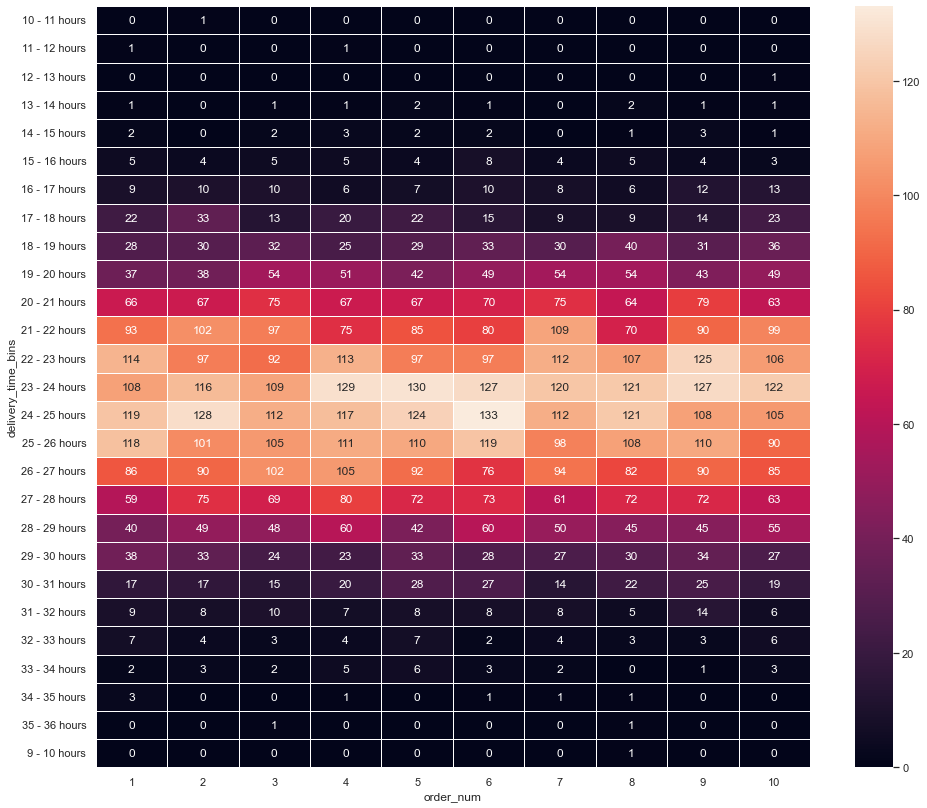

In [3]:
# Статистика величины
print(f'Moda: {df["order_price"].mode()[0]}')   # Нет одинаковых значений
print(f'Median: {df["order_price"].median()}')
print(f'Mean: {df["order_price"].mean()}')
print(f'Dispersion: {pow(df["order_price"].std(), 2)}')
print(f'StD: {df["order_price"].std()}\n\n')

# Сегмент времени доставки
df = df.sort_values(by='delivery_time')
df['delivery_time_bins'] = (df['delivery_time'] // 60).apply(lambda x: f'{int(x)} - {int(x+1)} hours')

# Группировка
grp = df.groupby(by=['delivery_time_bins', 'order_num']).agg(cnt=('user_id', 'count')).reset_index()

# Сводная таблица
grp_pivot = grp.pivot("delivery_time_bins", "order_num", "cnt").fillna(0).astype('int')

'''Построим HeatMap (почему бы нет?)'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(grp_pivot, annot=True, fmt="d", linewidths=.5, ax=ax)

# 4. Кластеризация
<ul>
<li>Любым удобным методом кластеризуйте пользователей, на основании переменных "время заказа" и "сумма заказа"</li>
<li>Обоснуйте число выбранных кластеров и присвойте их значения пользователям в отдельном столбце</li>
</ul>

In [ ]:
'''Примечание: Хочется сделать по уму, а это долго для тестового (учитывая, общее кол-во всех заданий).

Что делать:
1. Строим 2d диаграмму: Ox - время заказа, Oy - сумма заказа.
2. Если на диаграмме можно определить четкие скоплепния точек и их центры - она и будет обоснаванием выбора кол-ва кластеров
3. Если нельзя, тогда:
    3.1. Заходим сюда -> https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad
    3.2. Реализуем два-три метода определения. Какие? Можно попробовать понять из диграммы п.1.
4. В качестве метода используем k-means. Шаблоны кода можно найти в гугле по запросу k-means scikit learn.
    4.1. Осн. параметр - кол-во кластеров.
    *4.2. Доп. параметры - центры кластеров и другое понимаем из п.1, либо п.3.
5. Еще раз строим диаграмму из п.1, но уже с присвоенными цветами для каждого кластера. Проверяем рез-т.

На выходе получим что-то вроде: 1) Юзеры с большой суммой заказа, которые долго ждут
                                2) Юзеры с маленькой суммой заказа, которые быстро получают заказ
                                и какие-то кластеры между ними.
'''

# 5. АБ
<ul>
<li>Выберите два любых кластера пользователей и проведите их сравнение</li>
</ul>

#### ЗАДАНИЕ ПОСЛОЖНЕЕ – НЕОБЯЗАТЕЛЬНОЕ
<ul>
<li>Выберите три любых кластера и проведите их сравнение</li>
</ul>

In [ ]:
'''
На какой вопрос данное АБ тестирование должно ответить? Не знаю:)

Величины, которые точно стоило бы сравнить между кластерами:
                    1. Доля негатива по заказу.
                    2. На какой день покупатель совершает следующий заказ. Такое время возврата типично для него?
Такой анализ помог бы, например, сконцентрировать внимание на самых ценных юзерах, которые начинают реже заказывать из-за
проблем с долгой доставкой.
'''